In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("student-mat.csv")

In [4]:
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Function that plots out percentage distribution of alcohol consumption based on a column specified:

In [99]:
def percentages_consumption_by_attribute(df, attribute):
    dalc_counts = df.groupby([attribute, 'Dalc']).size()
    walc_counts = df.groupby([attribute, 'Walc']).size()
    consumption_totals = df.groupby([attribute]).size()
    
    percentages_dalc = dalc_counts / consumption_totals * 100
    percentages_walc = walc_counts / consumption_totals * 100

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a grid of 1 row and 2 columns
    
    # Plot workday consumption
    percentages_dalc.unstack().plot(kind="bar", stacked=True, ax=axes[0])
    axes[0].set_xlabel(attribute)
    axes[0].set_ylabel('Percentage')
    axes[0].set_yticks(range(0, 101, 10))
    axes[0].set_title(f'WORKDAY consumption by {attribute}')
    axes[0].legend(title="Consumption", loc='lower right')
    
    # Plot weekend consumption
    percentages_walc.unstack().plot(kind="bar", stacked=True, ax=axes[1])
    axes[1].set_xlabel(attribute)
    axes[1].set_ylabel('Percentage')
    axes[1].set_yticks(range(0, 101, 10))
    axes[1].set_title(f'WEEKEND consumption by {attribute}')
    axes[1].legend(title="Consumption", loc='lower right')
    
    plt.tight_layout()
    plt.show()

Running it with some examples:

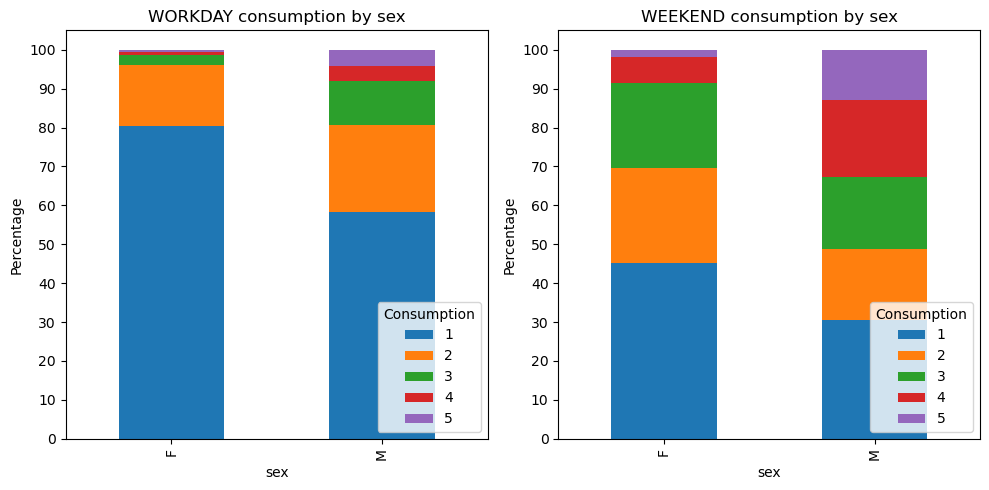

In [100]:
percentages_consumption_by_attribute(df, 'sex')

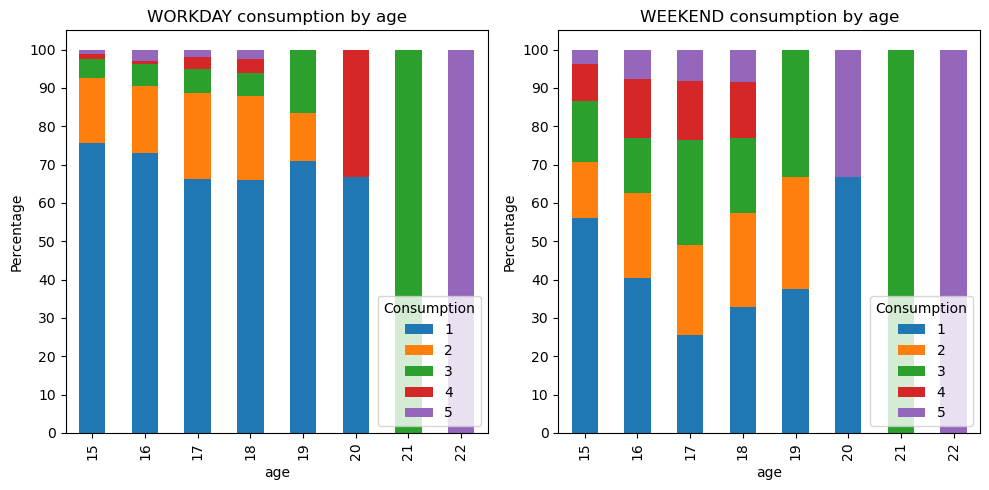

In [101]:
percentages_consumption_by_attribute(df, 'age')

That result shows that there's probably little data for ages > 19 and we should ignore it

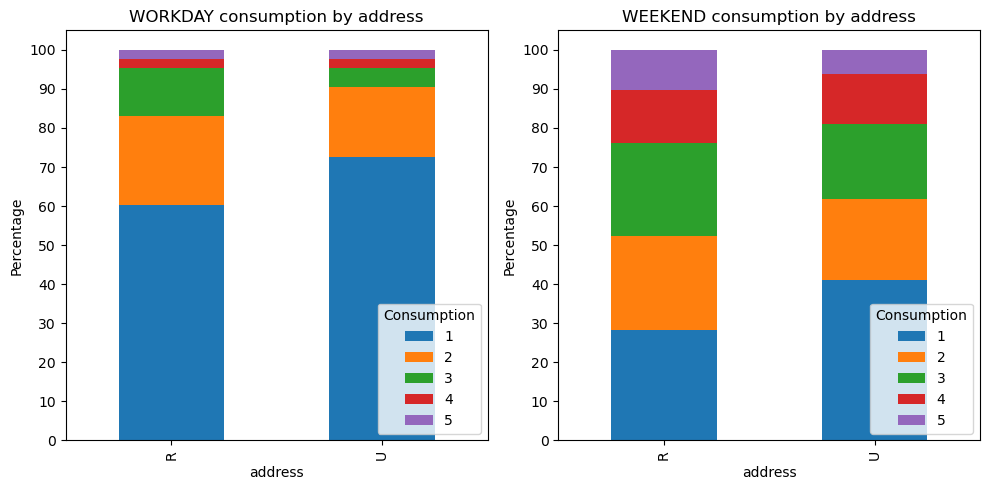

In [106]:
percentages_consumption_by_attribute(df, 'address')

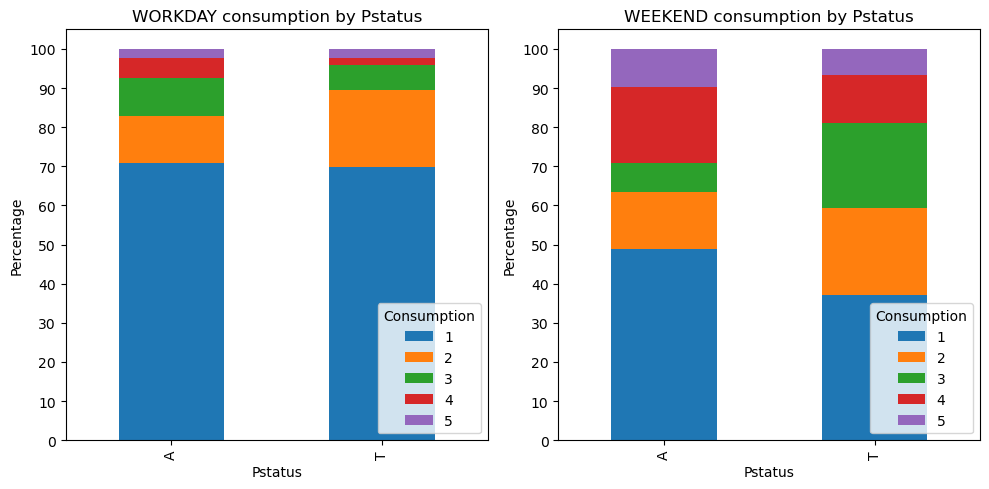

In [103]:
percentages_consumption_by_attribute(df, 'Pstatus')

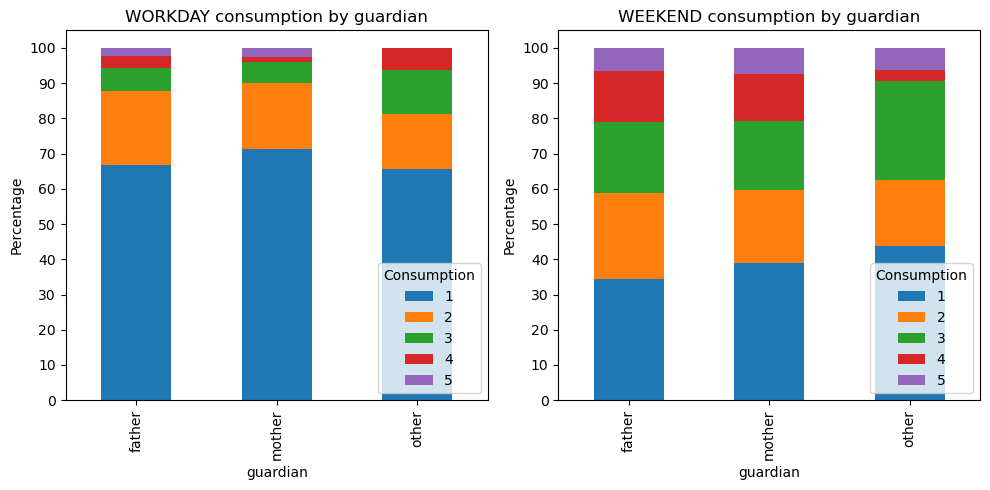

In [105]:
percentages_consumption_by_attribute(df, 'guardian')